#  Data Visualization with Python

Seaborn is one of the popular visualization tools.  

It's relatively easy to learn and meets most of the requirements in business and scientific research.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


Seanborn is shipped with several datasets for educational purpose.
We'll use the preloaded dataset in this tutorial.



In [2]:
sns.get_dataset_names()

C:\3rdParty\Anaconda3\envs\stats_rethink\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\3rdParty\Anaconda3\envs\stats_rethink\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset("tips")

In [4]:
type(tips)

pandas.core.frame.DataFrame

In [5]:
tips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [6]:
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [7]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

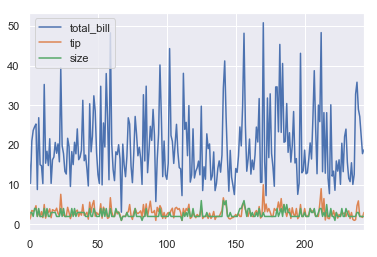

In [9]:
#a simple plot by pandas 
tips.plot()

In [10]:
#if we want more sophisticated plots, we turn to seaborn


### How is the tip related to total_bill?

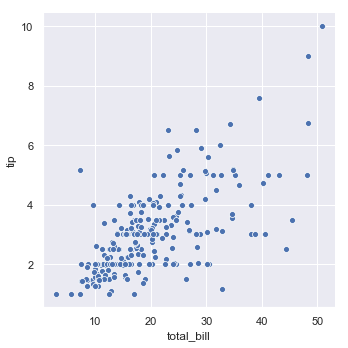

In [15]:
sns.relplot(x='total_bill',y='tip',data=tips)

### Does gender play a role? 

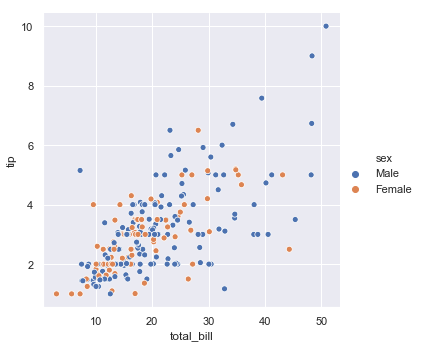

In [16]:
sns.relplot(x='total_bill',y='tip',hue='sex',data=tips)

### Do smokers tip better or worse?


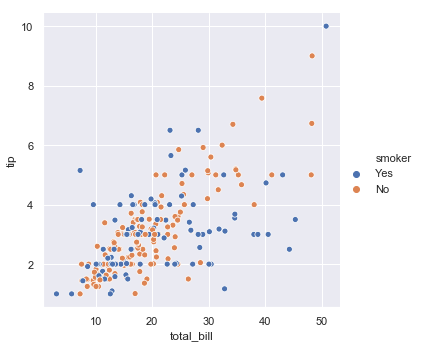

In [17]:
sns.relplot(x='total_bill',y='tip',hue='smoker',data=tips)

### Do male smokers tip better or worse?

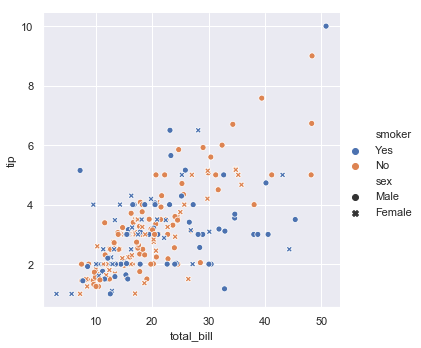

In [20]:
sns.relplot(x='total_bill',y='tip',hue='smoker', style='sex', data=tips)

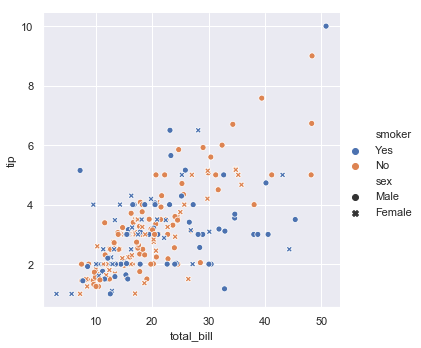

In [29]:
sns.relplot(x='total_bill',y='tip',hue='smoker', style='sex', data=tips)

### People tend to tip more at dinner than at lunch, or do they?

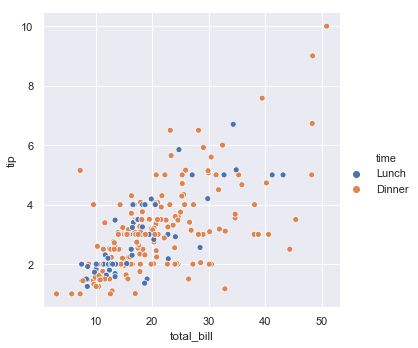

In [30]:
sns.relplot(x='total_bill',y='tip',hue='time',  data=tips)

### Larger parties tip better or worse?

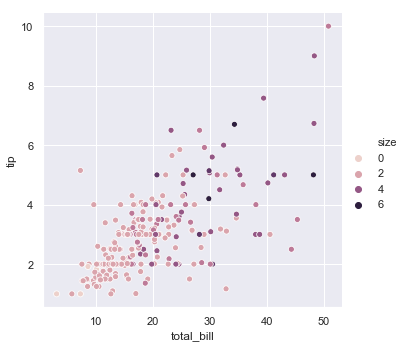

In [31]:
sns.relplot(x='total_bill',y='tip',hue='size',  data=tips)

In [32]:
#It might be better to represent party size by the size of the dot than the color of the dot

sns.relplot(x='total_bill',y='tip', size='size',  data=tips)


In [35]:
#or we can make the size difference more dramatic:
sns.relplot(x='total_bill',y='tip', size='size', sizes=(15, 200),  data=tips)

### Does time (Lunch or Dinner) play a role?

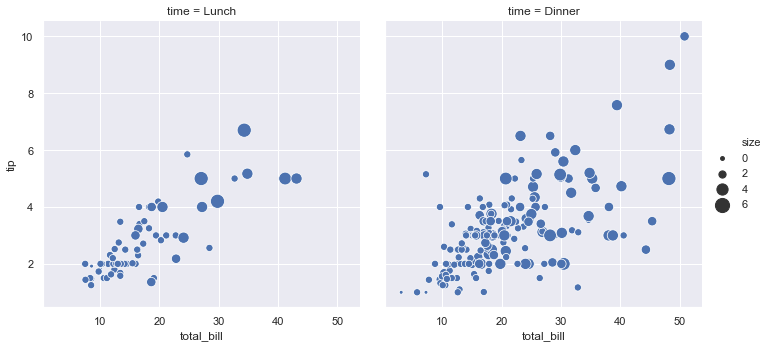

In [36]:
sns.relplot(x='total_bill',y='tip',col='time', size='size', sizes=(15, 200),  data=tips)

### Weekends vs weekdays?


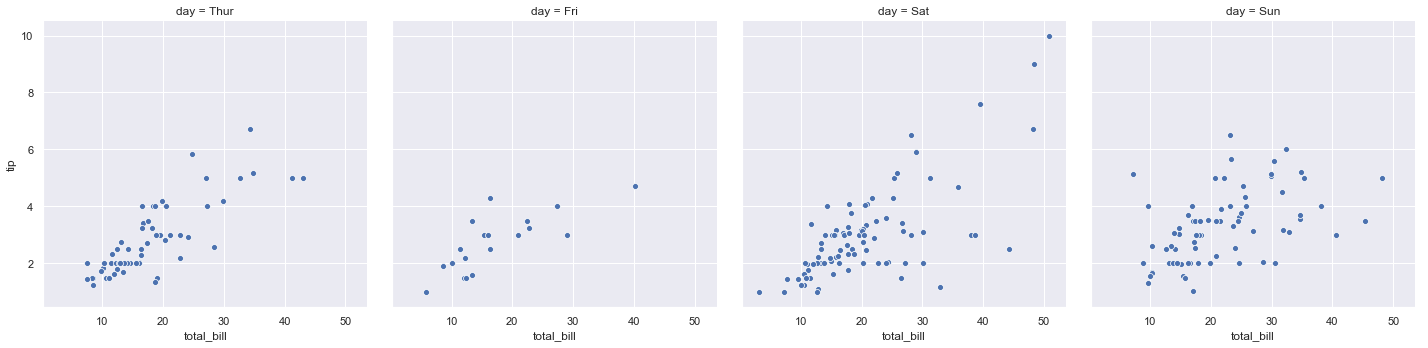

In [38]:
sns.relplot(x='total_bill',y='tip',col='day',  data=tips)

In [40]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

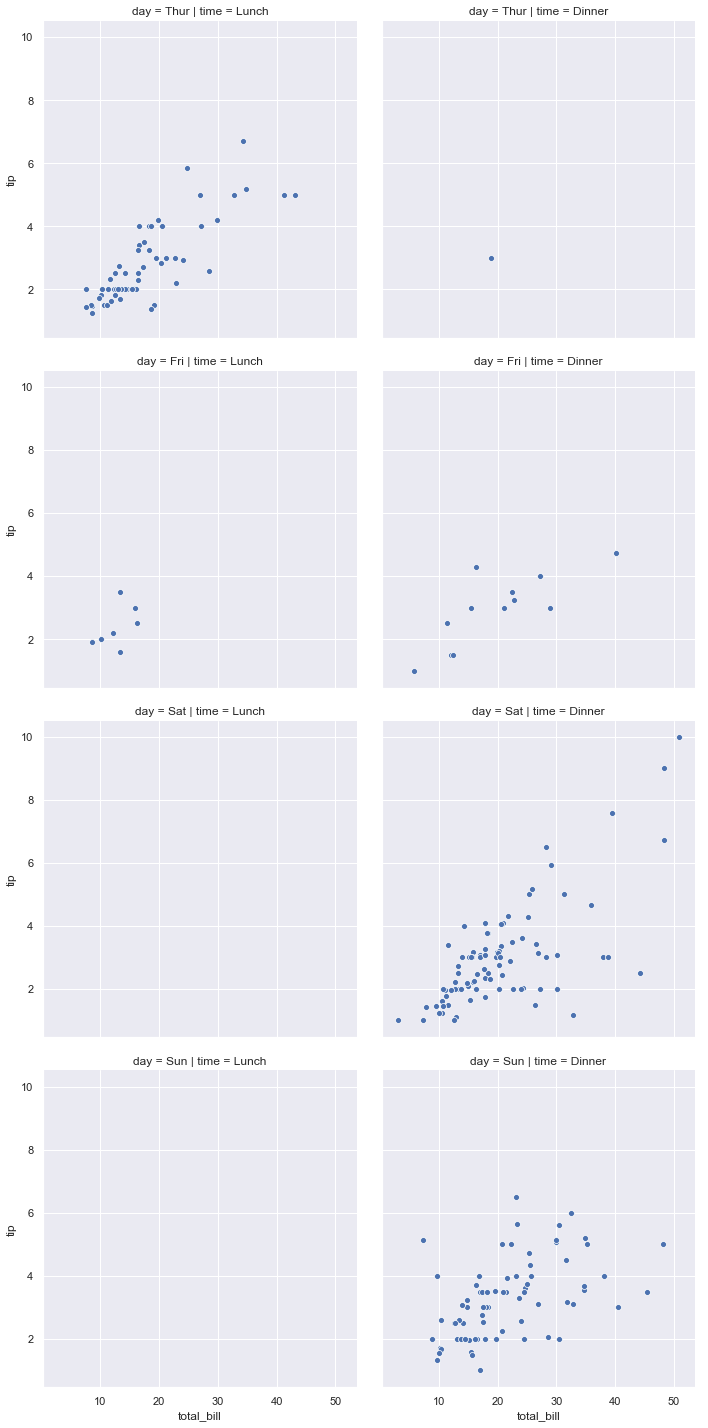

In [42]:
sns.relplot(x='total_bill',y='tip',col='time',row='day',  data=tips)

In [43]:
sns.relplot(x='total_bill',y='tip',col='time',row='day', hue='sex',  data=tips)

## Visualize linear relationship

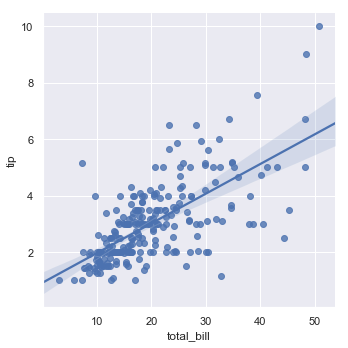

In [59]:

sns.lmplot(x='total_bill',y='tip', data=tips)


In [50]:
#we can make a prediction of tip based on total_bill with some confidence
#band is the CI at 95% (Confidence Interval)

In [56]:
## Add colomn percentage
tips['percentage']= round(tips.tip/tips.total_bill * 100)

In [57]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
percentage    244 non-null float64
dtypes: category(4), float64(3), int64(1)
memory usage: 9.1 KB


In [58]:
tips.describe()

total_bill         tip        size  percentage
count  244.000000  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672   16.094262
std      8.902412    1.383638    0.951100    6.102968
min      3.070000    1.000000    1.000000    4.000000
25%     13.347500    2.000000    2.000000   13.000000
50%     17.795000    2.900000    2.000000   15.500000
75%     24.127500    3.562500    3.000000   19.000000
max     50.810000   10.000000    6.000000   71.000000

In [60]:
sns.lmplot(x='total_bill',y='percentage', data=tips)
